# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.__version__

'1.3.0'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [335]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [336]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [5]:
cast = pd.read_csv('cast.csv.zip')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [6]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [7]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [9]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [10]:
len(movies)

244914

### List all Batman movies ever made

In [12]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [13]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [14]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [19]:
harrypotter_df = movies[movies.title.str.contains('Harry Potter',case=False)]
print('Total Harry Potter Movies:', len(harrypotter_df))
harrypotter_df.head(10)
harrypotter_df.sort_values(by=['year'], ascending=True).iloc[:15]

Total Harry Potter Movies: 8


,title,year
223087,Harry Potter and the Sorcerer's Stone,2001
82791,Harry Potter and the Chamber of Secrets,2002
61957,Harry Potter and the Prisoner of Azkaban,2004
187926,Harry Potter and the Goblet of Fire,2005
50581,Harry Potter and the Order of the Phoenix,2007
109213,Harry Potter and the Half-Blood Prince,2009
152831,Harry Potter and the Deathly Hallows: Part 1,2010
143147,Harry Potter and the Deathly Hallows: Part 2,2011


### How many movies were made in the year 2017?

In [20]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [21]:
len(movies[movies.year == 2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [23]:
len(movies[(movies.year >= 2000) & (movies.year <= 2018)])

114070

### Section I - Q4: How many movies are titled "Hamlet"?

In [24]:
hamlet_df = movies[movies.title.str.contains('Hamlet', case=False)]
print('Total Hamlet Movies:', len(hamlet_df))
hamlet_df.head(10)

Total Hamlet Movies: 57


,title,year
1931,Hamlet,2009
8214,Hamlet,1976
10364,Hamlet A.D.D.,2014
17531,Hamlet's Ghost,2015
17833,Zombie Hamlet,2012
40045,Hamlet (II),2005
44571,Hamlet (II),2015
46344,Hamlet,1921
47248,Hamlet liikemaailmassa,1987
50271,Hamlet/Horatio,2017


In [27]:
hamlet_df.sort_values(by=['year'], ascending=True).iloc[:60]

,title,year
181090,Hamlet,1910
124506,Hamlet,1911
118535,Hamlet,1913
142663,A Sagebrush Hamlet,1919
46344,Hamlet,1921
66134,"Han, hun og Hamlet",1922
108528,"Han, hun og Hamlet",1932
73869,Hamlet,1948
140203,Hamlet,1954
155004,Hamlet,1964


### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [28]:
new_hamlet_df = hamlet_df[hamlet_df.year>=2000]
new_hamlet_df.sort_values(by=['year'], ascending=True).iloc[:60]

,title,year
55639,Hamlet,2000
55525,Hamlet in the Hamptons,2002
137905,Hamlet_X,2003
218468,Hamlet X,2004
40045,Hamlet (II),2005
152920,"Dogg's Hamlet, Cahoot's Macbeth",2005
200246,The Tragedy of Hamlet Prince of Denmark,2007
176528,Hamlet (II),2007
156899,Hamlet (III),2007
52408,Hamlet the Vampire Slayer,2008


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [89]:
inception_df = movies[movies.title == 'Inception']
inception_cast = inception_df.merge(cast, on=['title','year'], suffixes=('_m','_c'))

In [100]:
supporting_cast_inception = inception_cast[inception_cast.n.isnull()].reindex()

In [103]:
supporting_cast_inception.name.count()

27

#### There are 27 cast members identified as 'Support Cast' in the movie "Inception"

### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [106]:
main_cast_inception = inception_cast[inception_cast.n.notnull()].reindex()

In [108]:
main_cast_inception.name.count()

51

#### There are 51 cast members identified as 'Main Cast' in the movie "Inception"

### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [277]:
main_cast_inception.sort_values(by='n').head(10)

,title,year,name,type,character,n
12,Inception,2010,Leonardo DiCaprio,actor,Cobb,1.0
23,Inception,2010,Joseph Gordon-Levitt,actor,Arthur,2.0
73,Inception,2010,Ellen Page,actress,Ariadne,3.0
25,Inception,2010,Tom Hardy,actor,Eames,4.0
55,Inception,2010,Ken Watanabe,actor,Saito,5.0
47,Inception,2010,Dileep Rao,actor,Yusuf,6.0
38,Inception,2010,Cillian Murphy,actor,Robert Fischer,7.0
2,Inception,2010,Tom Berenger,actor,Browning,8.0
57,Inception,2010,Marion Cotillard,actress,Mal,9.0
44,Inception,2010,Pete Postlethwaite,actor,Maurice Fischer,10.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [117]:
character = cast[cast.character.str.contains("Albus Dumbledore", case=False)]

In [123]:
albus_dumbledore_movies = character.title.unique()

#### (A) All movies where there was a character 'Albus Dumbledore'

In [121]:
albus_dumbledore_movies

array(['Epic Movie', 'Harry Potter and the Deathly Hallows: Part 1',
       'Harry Potter and the Deathly Hallows: Part 2',
       'Harry Potter and the Goblet of Fire',
       'Harry Potter and the Half-Blood Prince',
       'Harry Potter and the Order of the Phoenix',
       'Harry Potter and the Prisoner of Azkaban',
       'Harry Potter and the Chamber of Secrets',
       "Harry Potter and the Sorcerer's Stone", 'Ultimate Hero Project',
       'Potter'], dtype=object)

In [124]:
albus_dumbledore_actor = character.name.unique()

#### (B) All Actors who played the character of  'Albus Dumbledore'

In [125]:
albus_dumbledore_actor

array(['Dane Farwell', 'Michael Gambon', 'Richard Harris',
       "George (X) O'Connor", 'Toby Regbo', 'Timothy Tedmanson'],
      dtype=object)

In [127]:
character.sort_values(by='year')

,title,year,name,type,character,n
947790,Harry Potter and the Sorcerer's Stone,2001,Richard Harris,actor,Albus Dumbledore,1.0
947789,Harry Potter and the Chamber of Secrets,2002,Richard Harris,actor,Albus Dumbledore,32.0
792424,Harry Potter and the Prisoner of Azkaban,2004,Michael Gambon,actor,Albus Dumbledore,27.0
792421,Harry Potter and the Goblet of Fire,2005,Michael Gambon,actor,Albus Dumbledore,37.0
704984,Epic Movie,2007,Dane Farwell,actor,Albus Dumbledore,17.0
792423,Harry Potter and the Order of the Phoenix,2007,Michael Gambon,actor,Albus Dumbledore,36.0
792422,Harry Potter and the Half-Blood Prince,2009,Michael Gambon,actor,Professor Albus Dumbledore,2.0
792419,Harry Potter and the Deathly Hallows: Part 1,2010,Michael Gambon,actor,Professor Albus Dumbledore,39.0
1893421,Harry Potter and the Deathly Hallows: Part 1,2010,Toby Regbo,actor,Young Albus Dumbledore,NaN
792420,Harry Potter and the Deathly Hallows: Part 2,2011,Michael Gambon,actor,Professor Albus Dumbledore,2.0


### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [163]:
keanu_reeves_movie = cast[cast.name.str.contains("Keanu Reeves", case=False)]

In [164]:
keanu_reeves_character = keanu_reeves_movie.character.unique()

In [165]:
import numpy as np

In [166]:
np.count_nonzero(keanu_reeves_character)

56

#### (A) There are 56 roles that 'Keanu Reeves' has played throughout his career

In [172]:
keanu_reeves_movie_recent = keanu_reeves_movie[keanu_reeves_movie['year']>1999]

In [173]:
keanu_reeves_character_recent = keanu_reeves_movie_recent.character.unique()

In [174]:
np.count_nonzero(keanu_reeves_character_recent)

29

In [185]:
keanu_reeves_recent_roles = pd.DataFrame(keanu_reeves_movie_recent.year, keanu_reeves_movie_recent.character)

In [187]:
keanu_reeves_recent_roles = keanu_reeves_movie_recent.loc[:,['year','character']]

#### (B) Keanu Reeves - Leading Roles after 1999 - sorted by year

In [189]:
keanu_reeves_recent_roles.sort_values(by='year')

,year,character
1892397,2000,Shane Falco
1892387,2000,Donnie Barksdale
1892398,2000,Griffin
1892383,2001,Nelson Moss
1892358,2001,Conor O'Neill
1892391,2003,Neo
1892392,2003,Neo
1892379,2003,Julian Mercer
1892351,2005,Dogstar
1892348,2005,John Constantine


### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [220]:
cast_1950_1960 = cast[(cast.type.isin(['actor','actress'])) & (cast['year']>=1950) & (cast['year']<=1960)]
cast_2007_2017 = cast[(cast.type.isin(['actor','actress'])) & (cast['year']>=2007) & (cast['year']<=2017)]

In [221]:
characters_1950_1960 = cast_1950_1960.loc[:,['character']]
characters_2007_2017 = cast_2007_2017.loc[:,['character']]

#### (A) List the total number of actor and actress roles available from 1950 - 1960

In [228]:
characters_1950_1960

,character
66,Limbo Dance by
67,Hollandse boer
68,Dirk Jan
111,Themselves
116,Themselves
...,...
3786059,The Queen
3786061,Frk. Lind
3786075,moren til Trygve
3786083,Kontordame


#### (B) List the total number of actor and actress roles available from 2007 - 2017

In [227]:
characters_2007_2017

,character
0,Buffy 4
2,Bobby Riggs Fan
3,2002 Dodger Fan
4,1988 Opera House Patron
5,Club Patron
...,...
3786159,Home Nurse
3786160,?l?f
3786166,Katrin Eldri
3786167,A?albj?rg - Dagga's Mother


### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [306]:
lead_role_post_2000 = cast[(cast['n']<=2) & (cast['year']>=2000)]


In [307]:
non_lead_role_post_2000 = cast[(cast['n']>2) & (cast['year']>=2000)]

In [308]:
lead_role_post_2000.sort_values(by=['year','title','n'])


,title,year,name,type,character,n
1359014,$pent,2000,Jason London,actor,Max,1.0
3599715,$pent,2000,Charlie Spradling,actress,Brigette,2.0
1893650,'Di ko kayang tanggapin,2000,April Boy Regino,actor,Danny Boy,1.0
3595549,'Di ko kayang tanggapin,2000,Ciara Sotto,actress,Sheryl,2.0
2843758,(I'm Living) A Charmed Life,2000,Tameson Duffy,actress,Duffy,2.0
...,...,...,...,...,...,...
2135010,Astronomy Walkers,2020,Aaron Smolinski,actor,Anthony Speranza,1.0
2641034,Astronomy Walkers,2020,Melantha Blackthorne,actress,Spirit Guide,2.0
594544,Infinite Payback,2020,Aaron Dill,actor,Dark,1.0
594545,Infinite Payback,2020,Aaron Dill,actor,Nathen,1.0


In [309]:
non_lead_role_post_2000.sort_values(by=['year','title','n'])

,title,year,name,type,character,n
1331043,$pent,2000,Phill Lewis,actor,Doug,3.0
161267,$pent,2000,Erin Beaux,actor,Nathan,4.0
1748225,$pent,2000,James Parks,actor,Grant,5.0
84662,$pent,2000,Richmond Arquette,actor,Jay,6.0
2605277,$pent,2000,Barbara Barrie,actress,Mrs. Walsh,7.0
...,...,...,...,...,...,...
3159644,X,2019,Ia Langhammer,actress,Karin,9.0
3365317,X,2019,Thea Sofie Loch N?ss,actress,Pernille,10.0
773457,Astronomy Walkers,2020,Troy Fromin,actor,Francis,5.0
616796,Astronomy Walkers,2020,Shawn Doucette,actor,Clarence,6.0


#### (A) List the total number of leading roles available from 2000 to present. 
Assuming lead roles are ranked 1 & 2.

In [311]:
lead_role_post_2000['character'].count()

117332

#### (B) List the total number of non leading roles available from 2000 to present. 
Assuming non lead roles are ranked 1 & 2.

In [312]:
non_lead_role_post_2000['character'].count()

944946

In [315]:
support_role_post_2000 = cast[(cast['n'].isnull()) & (cast['year']>=2000)]

#### (C) List the total number of support\extra-credit roles available from 2000 - present

In [317]:
support_role_post_2000['character'].count()

887484

# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [318]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
Maya                    12
Temptation              12
The Outsider            12
Freedom                 11
The Three Musketeers    11
Honeymoon               11
Othello                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

<AxesSubplot:>

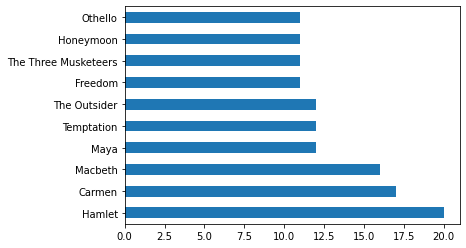

In [319]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [346]:
movies_2000s = movies[(movies['year']>=2000)]

<AxesSubplot:xlabel='year'>

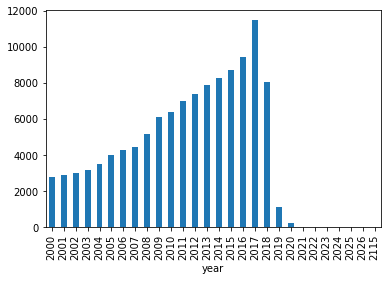

In [363]:
movies_2000s.groupby('year').size().plot(kind='bar')

#### 2017 saw the most movies released

### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

In [348]:
movies['decade'] = (movies['year']//10)*10

<AxesSubplot:xlabel='decade'>

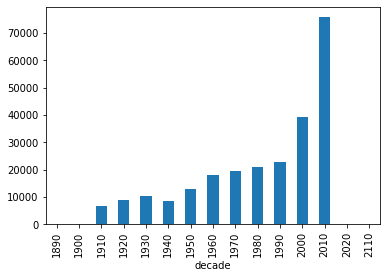

In [364]:
movies.groupby('decade').size().plot(kind='bar')

#### The decade 2010 saw the most movies released

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

#### (A) What are the top 10 most common character names in movie history?

In [360]:
cast.character.value_counts().head(10)

Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Name: character, dtype: int64

#### (B) Who are the top 10 people most often credited as "Herself" in movie history?

In [371]:
cast[cast['character']=='Herself'].name.value_counts().head(10)

Queen Elizabeth II           12
Joyce Brothers                9
Luisa Horga                   9
Mar?a Luisa (V) Mart?n        9
Margaret Thatcher             8
Hillary Clinton               8
In?s J. Southern              6
Mar?a Isabel (III) Mart?n     6
Marta Berrocal                6
Sumie Sakai                   6
Name: name, dtype: int64

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

<AxesSubplot:xlabel='year'>

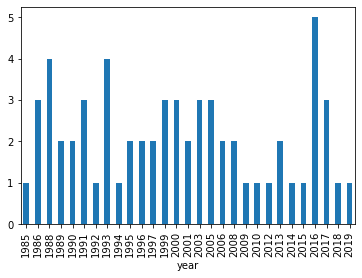

In [380]:
cast[cast['name']=='Keanu Reeves'].groupby(['year']).size().plot(kind='bar')

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


<AxesSubplot:xlabel='Year', ylabel='Cast Positions'>

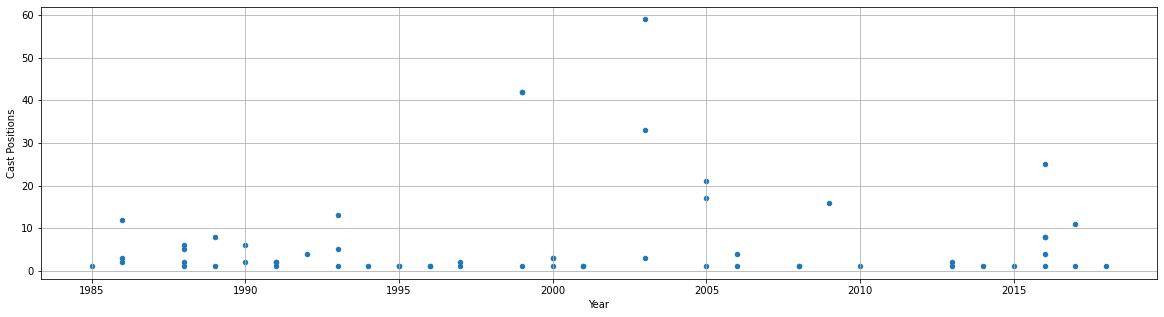

In [437]:
keanu_reeves_movie.plot(kind='scatter',x='year', y='n', grid=1, figsize=(20,5), xlabel='Year', ylabel='Cast Positions')

###### Need help to understand why a 'line' plot should show up as below

<AxesSubplot:xlabel='Year', ylabel='Cast Positions'>

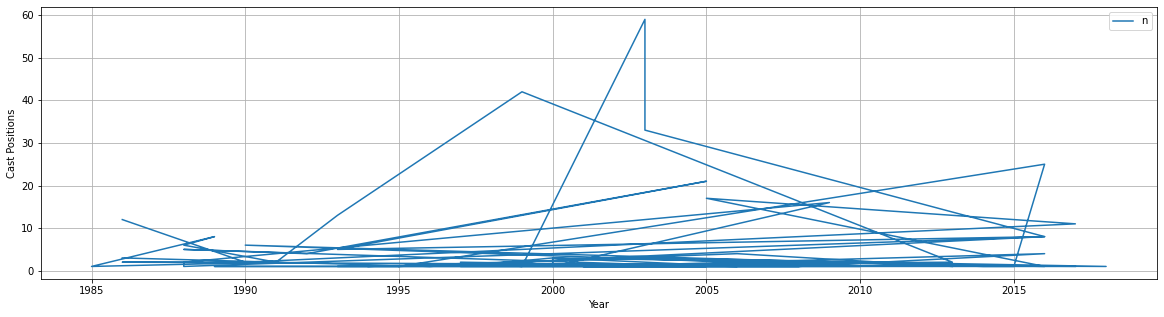

In [436]:
keanu_reeves_movie.plot(kind='line',x='year', y='n', grid=1, figsize=(20,5), xlabel='Year', ylabel='Cast Positions')

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

c:\program files\python37\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


<AxesSubplot:xlabel='decade'>

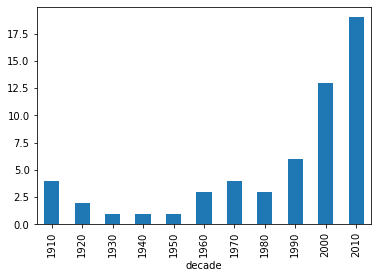

In [445]:
hamlet_df['decade'] = (hamlet_df['year']//10)*10
#print(hamlet_df)
hamlet_df.groupby('decade').size().plot(kind='bar')

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

<AxesSubplot:ylabel='type'>

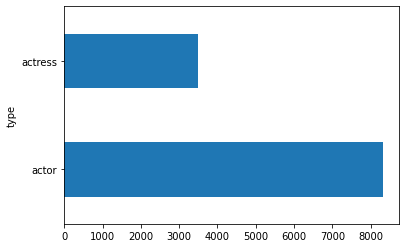

In [480]:
cast['decade'] = (cast['year']//10)*10
cast_60s_leading_roles = cast[(cast['decade']==1960) & (cast['n']<=1)]
cast_60s_leading_roles.groupby('type').size().plot(kind='barh')

<AxesSubplot:ylabel='type'>

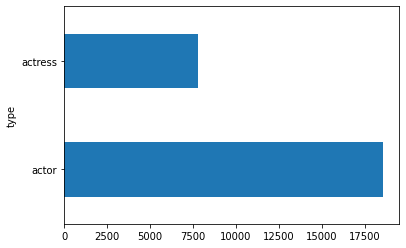

In [481]:
cast_2000s_leading_roles = cast[(cast['decade']==2000) & (cast['n']<=1)]
cast_2000s_leading_roles.groupby('type').size().plot(kind='barh')

### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [529]:
frank_oz = cast[(cast['name']=='Frank Oz')]
foz = frank_oz.groupby(['year','title']).count()
fozm = foz[foz['n']>1]
fozm

name  type  character  n  decade
year title                                                                 
1979 The Muppet Movie                         8     8          8  8       8
1981 An American Werewolf in London           2     2          2  2       2
     The Great Muppet Caper                   6     6          6  6       6
1982 The Dark Crystal                         2     2          2  2       2
1984 The Muppets Take Manhattan               7     7          7  7       7
1985 Follow That Bird                         3     3          3  3       3
1992 The Muppet Christmas Carol               7     7          7  7       7
1996 Muppet Treasure Island                   4     4          4  4       4
1999 Muppets from Space                       4     4          4  4       4
     The Adventures of Elmo in Grouchland     3     3          3  3       3

### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [541]:
fozc = frank_oz.groupby(['character']).size()
fozc[fozc>1].sort_values()

character
Grover            2
Bert              3
Fozzie Bear       4
Cookie Monster    5
Sam the Eagle     5
Animal            6
Miss Piggy        6
Yoda              6
dtype: int64

# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<AxesSubplot:>

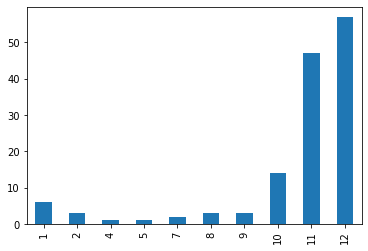

In [542]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<AxesSubplot:>

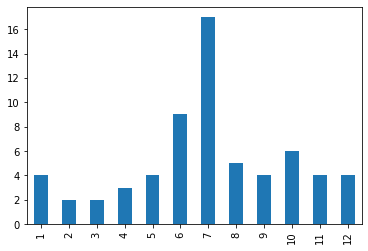

In [547]:
summer = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
summer.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

<AxesSubplot:>

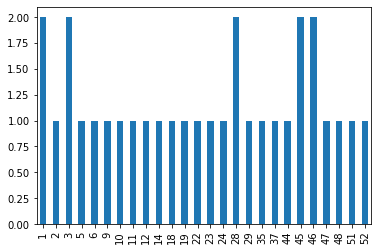

In [548]:
action = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
action.date.dt.isocalendar().week.value_counts().sort_index().plot(kind='bar')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [574]:
release_cast = release_dates.merge(cast, on=['title','year'])
keanu_lead = release_cast[(release_cast['name']=='Keanu Reeves') & (release_cast['country']=='USA') & (release_cast['n']==1)]
keanu_lead.loc[:,['title','date']].sort_values(by='date')

,title,date
16617480,The Night Before,1988-04-15
1976880,Bill & Ted's Excellent Adventure,1989-02-17
1976345,Bill & Ted's Bogus Journey,1991-07-19
8768200,Little Buddha,1994-05-25
13378143,Speed,1994-06-10
7569354,Johnny Mnemonic,1995-05-26
507600,A Walk in the Clouds,1995-08-11
2820055,Chain Reaction,1996-08-02
4911071,Feeling Minnesota,1996-09-13
15111030,The Devil's Advocate,1997-10-17


###### Just checking why Matrix 2 & Matrix 3 were not listed in the above. Looks like 'Keanu Reeves' was credited at 59 and 33 respectively, in the sequels.

In [573]:
matrix = release_cast[(release_cast.title.str.contains('Matrix',case=False)) & (release_cast['name']=='Keanu Reeves') & (release_cast['country']=='USA')]
matrix.loc[:,['name','title','date','n']].sort_values(by='date')

,name,title,date,n
16445857,Keanu Reeves,The Matrix,1999-03-31,1.0
16448100,Keanu Reeves,The Matrix Reloaded,2003-05-15,59.0
16453983,Keanu Reeves,The Matrix Revolutions,2003-11-05,33.0


### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

<AxesSubplot:xlabel='month'>

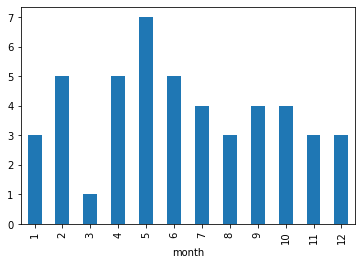

In [593]:
keanu = release_cast[(release_cast['name']=='Keanu Reeves') & (release_cast['country']=='USA')]
keanu['month'] = keanu.date.dt.month
keanu.groupby(['month']).size().plot(kind='bar')

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

<AxesSubplot:xlabel='year'>

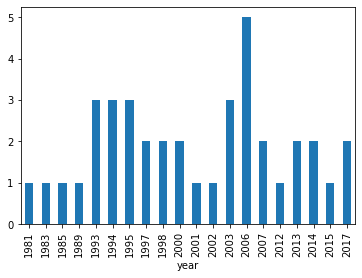

In [604]:
ianmckellan = release_cast[(release_cast['name']=='Ian McKellen') & (release_cast['country']=='USA')]
ianmckellan.groupby('year').size().plot(kind='bar')